In [14]:
import pandas as pd
import numpy as np

In [15]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [16]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [17]:
df.shape

(891, 3)

In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(714, 3)

In [21]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [25]:
clf = DecisionTreeClassifier()

In [26]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [28]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6261345852895148

In [31]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [32]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [33]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [34]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [40]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [42]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [43]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [44]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [45]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
421,21.0,4.0,7.7333,1.0,"(19.0, 21.0]","(7.25, 7.775]"
106,21.0,4.0,7.6500,1.0,"(19.0, 21.0]","(7.25, 7.775]"
292,36.0,10.0,12.8750,5.0,"(35.0, 38.0]","(10.5, 13.0]"
251,29.0,7.0,10.4625,4.0,"(28.0, 30.0]","(8.158, 10.5]"
701,35.0,10.0,26.2875,9.0,"(32.0, 35.0]","(26.0, 26.55]"


In [46]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [47]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [51]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6289514866979655

In [52]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6260758998435054


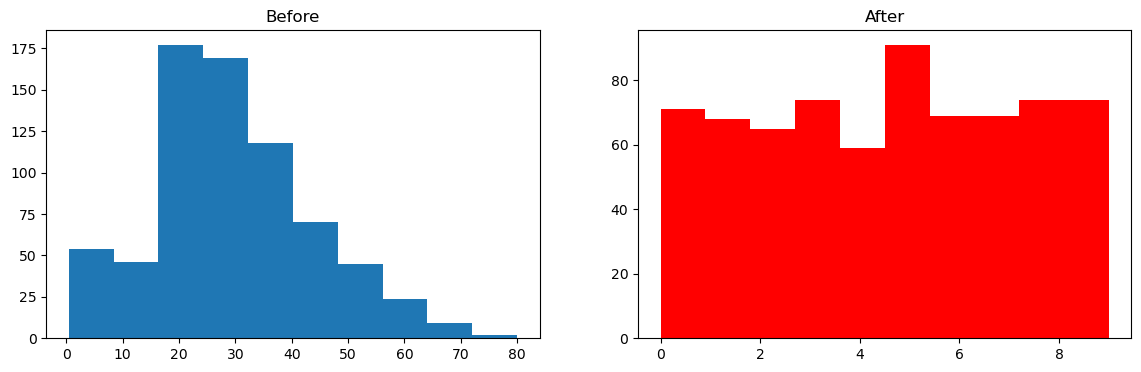

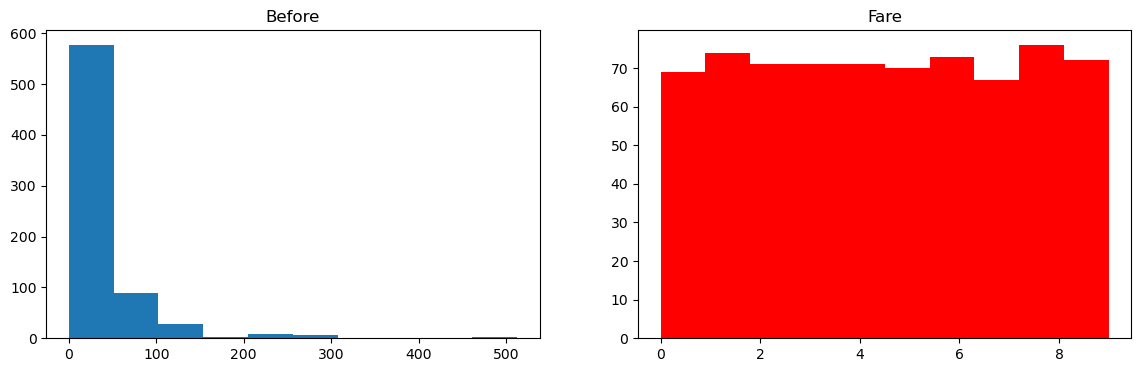

In [54]:
discretize(10,'quantile')

0.6373043818466354


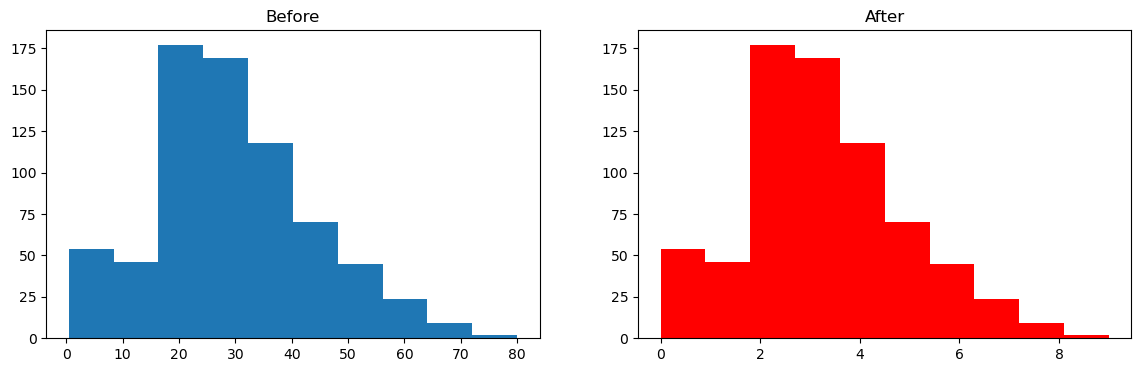

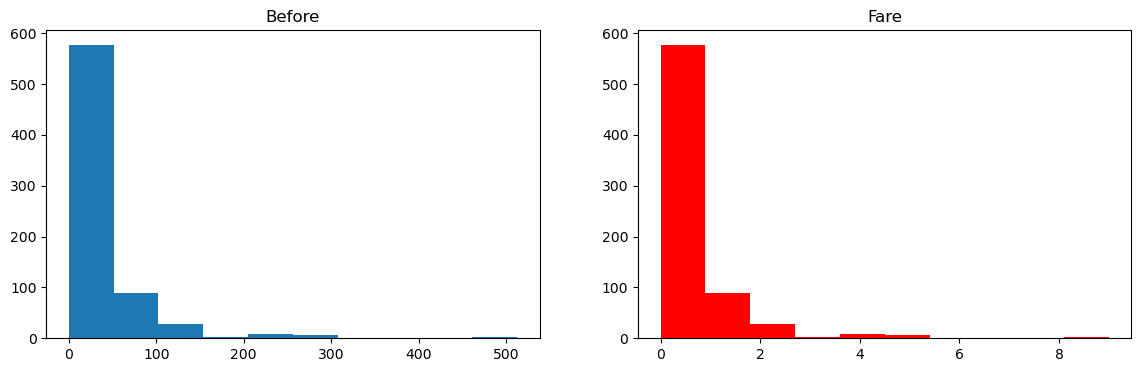

In [56]:
discretize(10,'uniform')